In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [250]:

df = pd.read_csv('dataset.csv', index_col='Year').loc[[2024]]
df

,Country,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Year,,,,,,,
2024,India,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
2024,Germany,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
2024,South Africa,Frozen Food,39478.70,40087.26,155.55,375.84,31.16
2024,USA,Beverages,22924.85,22406.24,89.59,836.05,45.43
2024,Saudi Arabia,Prepared Food,33085.77,28923.13,37.71,552.45,38.96
...,...,...,...,...,...,...,...
2024,Mexico,Beverages,36005.36,31410.97,111.78,120.03,59.35
2024,Spain,Meat & Seafood,4778.57,3898.87,152.62,1308.47,30.75
2024,UK,Frozen Food,43604.59,43474.62,173.77,1328.97,49.61


In [232]:
def plot_relational_plot(df):
    """
    Visualizes the relationship between Total Waste and Economic Loss using a scatter plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Scatter plot
    sns.scatterplot(
        x='Total Waste (Tons)', 
        y='Economic Loss (Million $)', 
        data=df,
        alpha=0.8, 
        s=70, 
        edgecolors='black', 
        linewidths=0.8
    )
    
    # Set axis labels
    ax.set_xlabel('Total Waste (Tons)', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Economic Loss (Million $)', fontsize=14, fontweight='bold', labelpad=10)
    
    # Set plot title with enhanced formatting
    ax.set_title('Economic Loss vs. Total Waste', fontsize=16, fontweight='bold', pad=15)
    
    # Customize grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6, which='both', color='gray', linewidth=0.5)
    
    # Improve layout
    plt.tight_layout()
    
    # Save the figure with higher resolution
    plt.savefig('relational_plot.png')
    
    # Display the plot
    plt.show()
    
    return


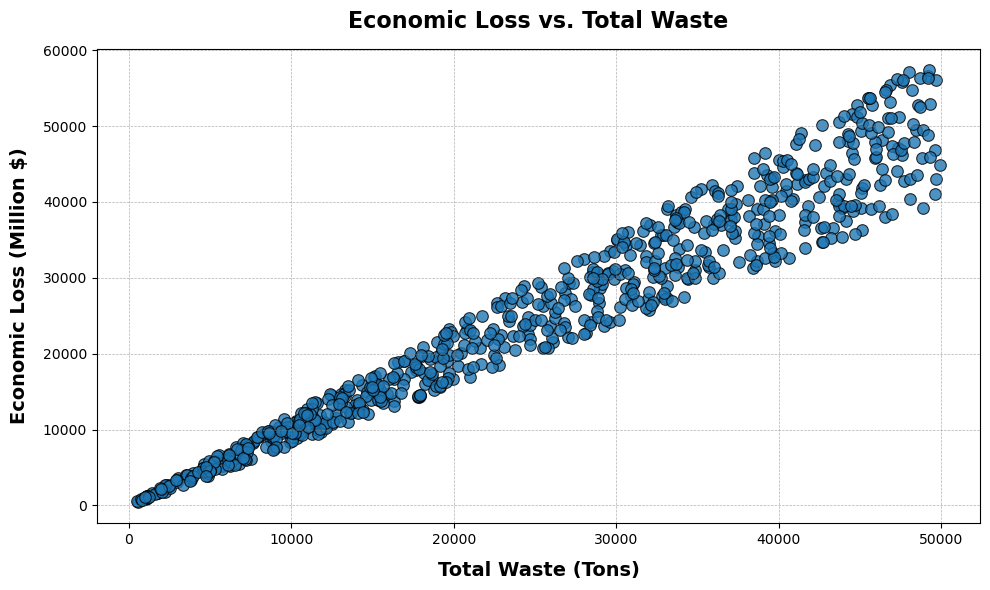

In [234]:
plot_relational_plot(df)

In [101]:
def plot_categorical_plot(df):
    """
    Plots a bar chart to compare total food waste (in tons) across different food categories.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create the bar plot with enhanced styling
    sns.barplot(
        x='Food Category', 
        y='Total Waste (Tons)', 
        data=df, 
        ax=ax, 
        palette='viridis', 
        hue='Food Category', 
        dodge=False, 
        legend=False
    )

    # Set axis labels with improved formatting
    ax.set_xlabel('Food Category', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Total Waste (Tons)', fontsize=14, fontweight='bold', labelpad=10)

    # Rotate x-tick labels for better readability
    ax.tick_params(axis='x', rotation=45, labelsize=12)

    # Set title with better emphasis
    ax.set_title('Total Food Waste by Category', fontsize=18, fontweight='bold', pad=20)

    # Customize gridlines for better clarity
    ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='y', color='gray', linewidth=0.5)

    # Improve layout
    plt.tight_layout()

    # Save the plot with higher resolution and better spacing
    plt.savefig('food_waste_by_category.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()
    return 

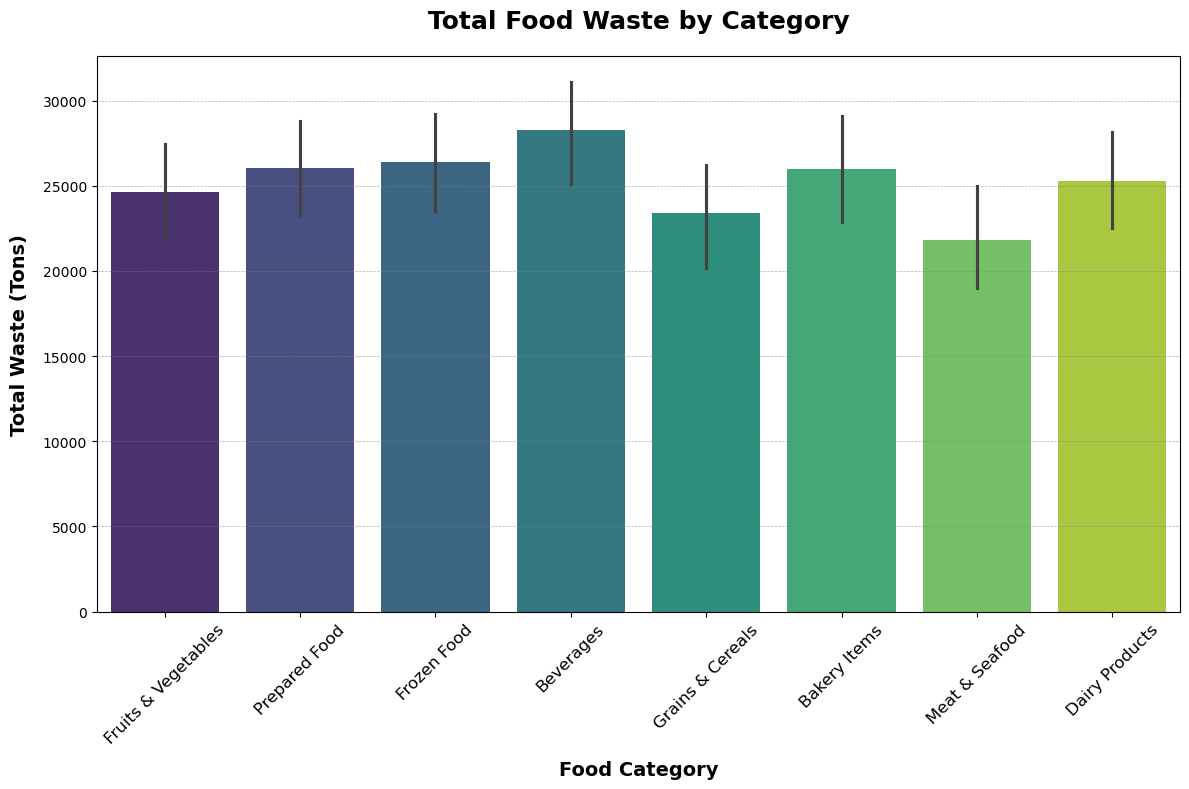

In [103]:
plot_categorical_plot(df)

In [109]:
def plot_statistical_plot(df):
    """
    Visualizes the distribution of average waste per capita (Kg) across different countries using a box plot.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create the box plot with enhanced styling
    sns.boxplot(
        x='Country', 
        y='Avg Waste per Capita (Kg)', 
        data=df, 
        palette='magma', 
        width=0.6, 
        linewidth=1.5, 
        fliersize=4, 
        ax=ax,
        hue='Country',  # Assigning x variable to hue as per future requirements
        dodge=False
    )

    # Set title and labels with improved formatting
    ax.set_title('Distribution of Average Waste per Capita by Country', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Country', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Avg Waste per Capita (Kg)', fontsize=14, fontweight='bold', labelpad=10)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45, labelsize=12)

    # Add a grid for better visualization
    ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='y', color='gray', linewidth=0.5)

    # Adjust layout to prevent overlapping elements
    plt.tight_layout()

    # Save the figure in high resolution with better spacing
    plt.savefig('waste_distribution.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()
    return 


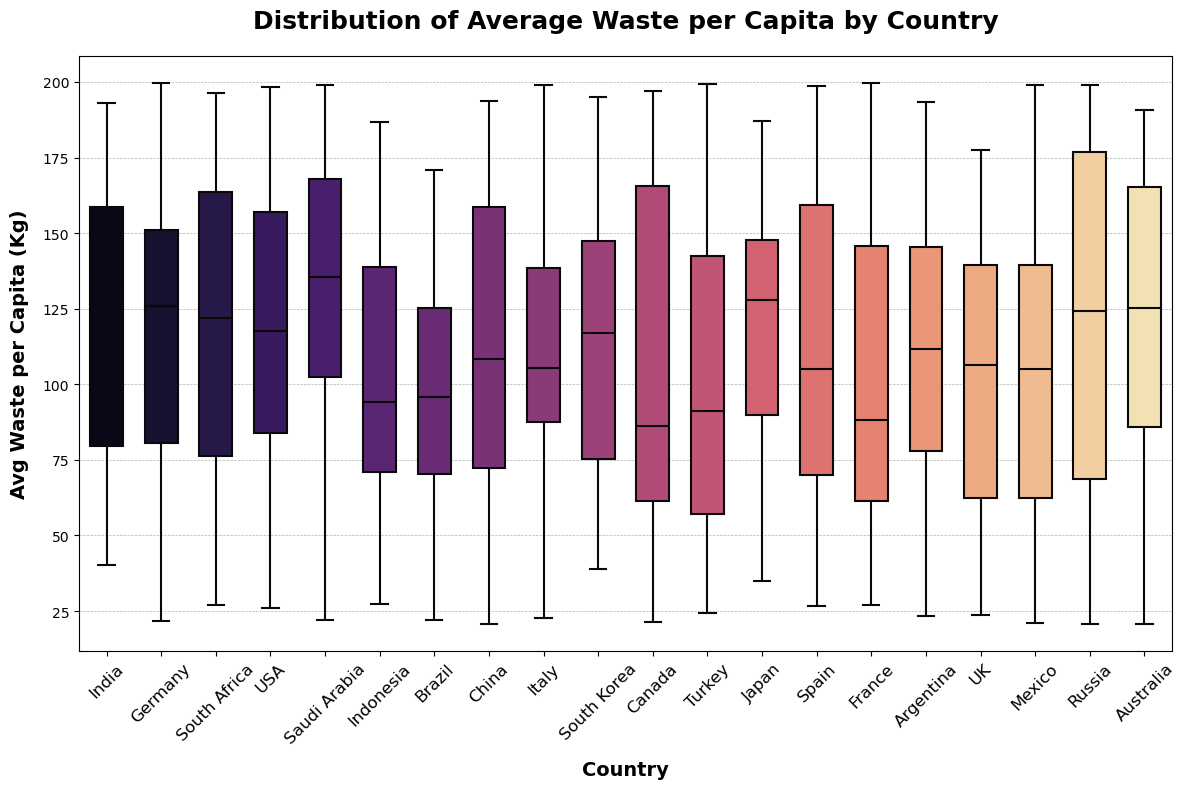

In [111]:
 plot_statistical_plot(df)

In [162]:
import scipy.stats as ss

def statistical_analysis(df, col: str):
    """
    Compute statistical moments: mean, standard deviation, skewness,
    and excess kurtosis for a given column.
    """
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col])
    excess_kurtosis = ss.kurtosis(df[col])

    return mean, stddev, skew, excess_kurtosis

def writing(moments, col):
    """
    Print statistical moments analysis.
    """
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:.2f}, '
          f'Skewness = {moments[2]:.2f}, and '
          f'Excess Kurtosis = {moments[3]:.2f}.')
    print('The data was not skewed and platykurtic.')
    return

# Example usage:
moments = statistical_analysis(df, 'Total Waste (Tons)')
writing(moments, 'Total Waste (Tons)')


For the attribute Total Waste (Tons):
Mean = 25200.91, Standard Deviation = 14289.53, Skewness = -0.00, and Excess Kurtosis = -1.25.
The data was not skewed and platykurtic.


In [154]:
import numpy as np
import pandas as pd

def preprocess_data(df):
    """
    Prepare the data by detecting missing values, generating summary statistics, and assessing correlations.
    """
    # Display the first few rows of the data
    print("\nPreview of the Data:")
    print(df.head())
    # Show summary statistics for numeric columns
    print("\nStatistical Summary:")
    print(df.describe())
    # Identify columns with missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values per Column:")
    print(missing_values[missing_values > 0])
    # Focus on numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    # Calculate and display the correlation matrix for numeric data
    print("\nCorrelation Matrix:")
    print(numeric_df.corr())
    return df

# Example usage:
df = preprocess_data(df)



Preview of the Data:
           Country        Food Category  Total Waste (Tons)  \
Year                                                          
2024         India  Fruits & Vegetables            11962.89   
2024       Germany        Prepared Food            45038.72   
2024  South Africa          Frozen Food            39478.70   
2024           USA            Beverages            22924.85   
2024  Saudi Arabia        Prepared Food            33085.77   

      Economic Loss (Million $)  Avg Waste per Capita (Kg)  \
Year                                                         
2024                   11196.04                     136.21   
2024                   39191.25                     179.27   
2024                   40087.26                     155.55   
2024                   22406.24                      89.59   
2024                   28923.13                      37.71   

      Population (Million)  Household Waste (%)  
Year                                             
2

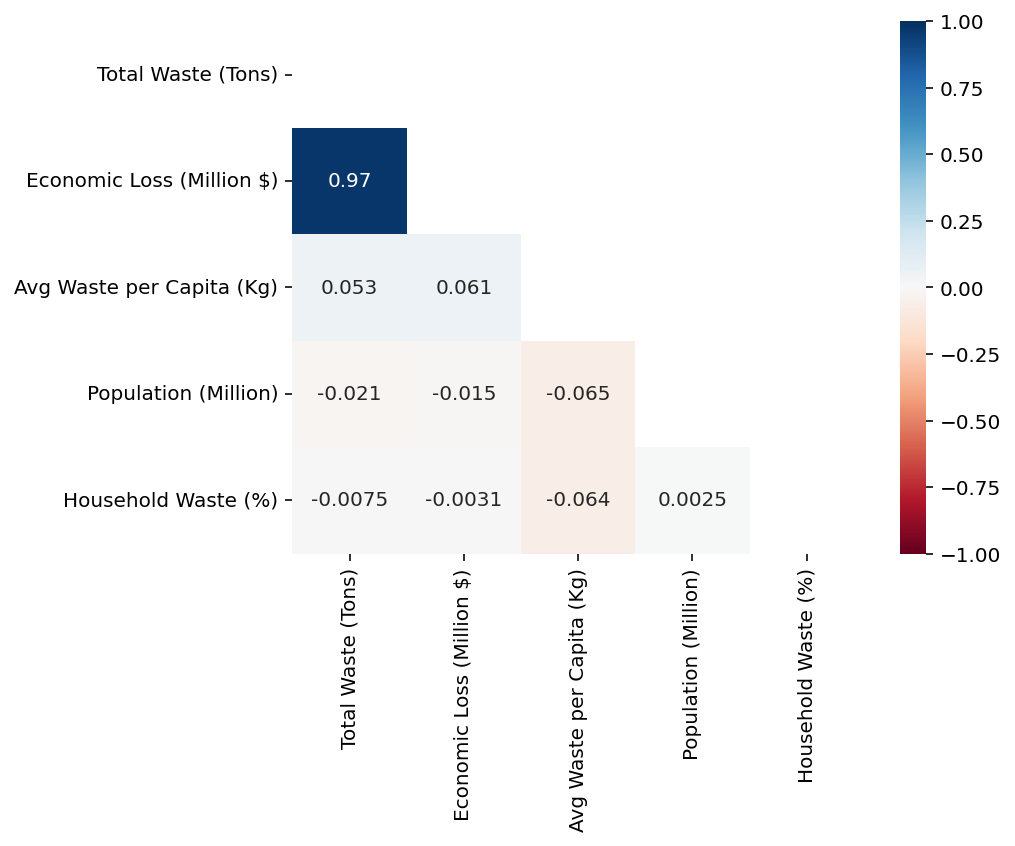

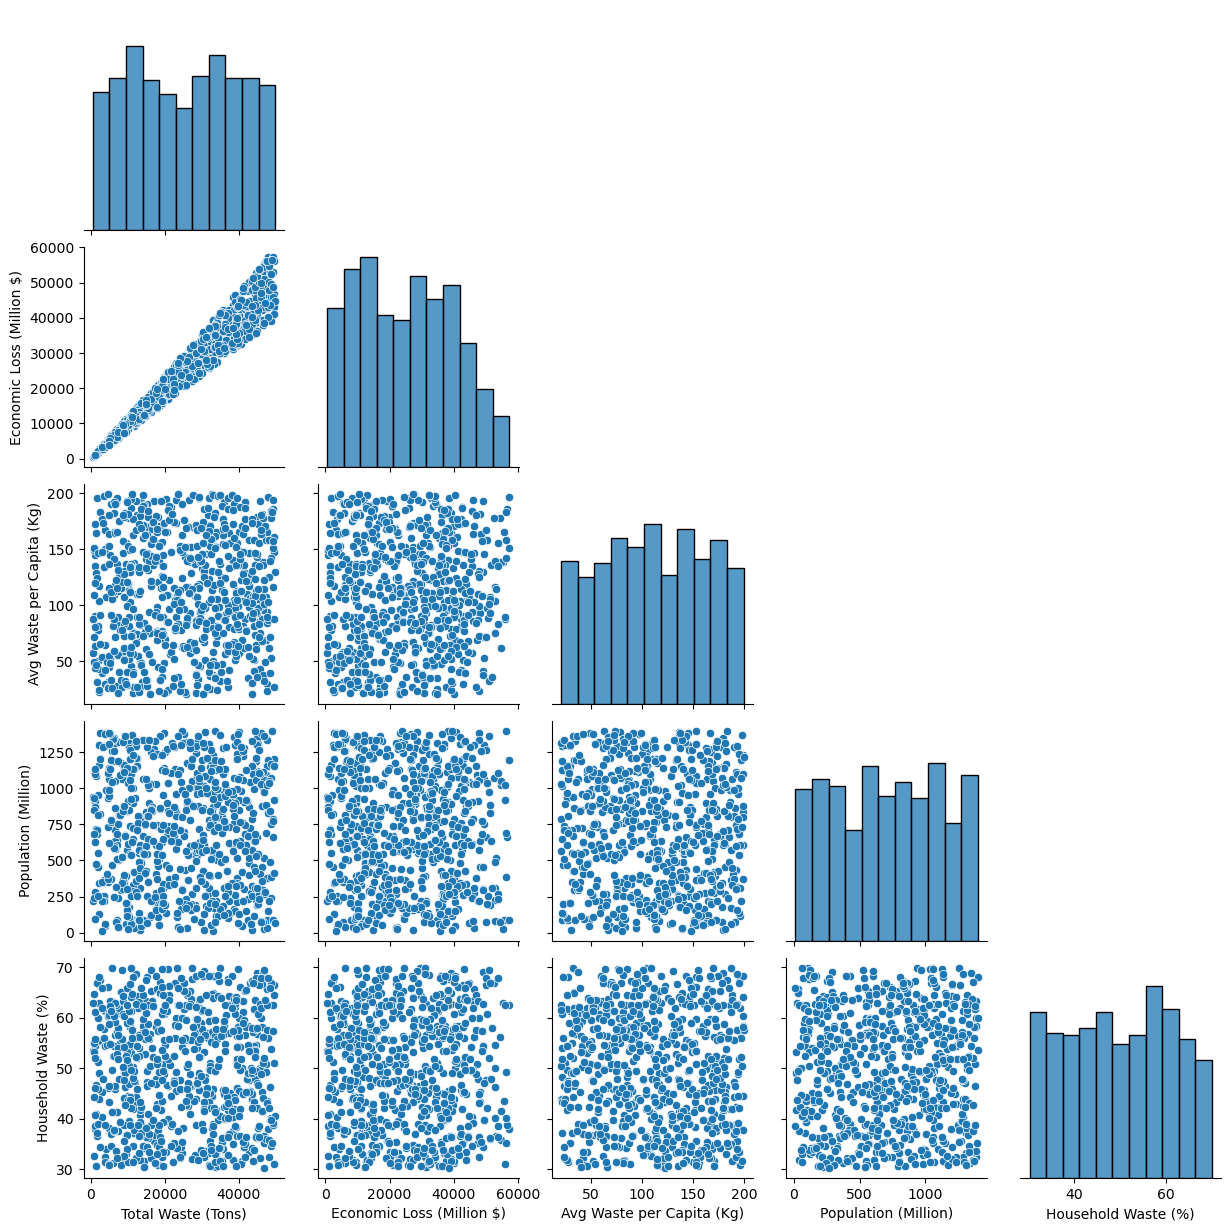

In [9]:
fig, ax = plt.subplots(dpi=144)
numeric_df = df.select_dtypes(include='number')
mask = np.triu(np.ones_like(numeric_df.corr()))
sns.heatmap(numeric_df.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
plt.show()

sns.pairplot(df, corner=True)
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
df_clust = df[['Economic Loss (Million $)', 'Avg Waste per Capita (Kg)']].copy()  
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_clust)
inv_norm = scaler.inverse_transform(norm)


In [15]:
# creating a custom colormap for plotting
from matplotlib.colors import ListedColormap

In [12]:
def perform_clustering(df, Population, Avg_Temperature_degC):
perform_clustering(df, 'Population', 'Avg_Temperature_degC')



IndentationError: expected an indented block after function definition on line 1 (3017268560.py, line 2)

 2 clusters silhouette score = 0.36
 3 clusters silhouette score = 0.39
 4 clusters silhouette score = 0.41
 5 clusters silhouette score = 0.38
 6 clusters silhouette score = 0.37
 7 clusters silhouette score = 0.38
 8 clusters silhouette score = 0.37
 9 clusters silhouette score = 0.36
10 clusters silhouette score = 0.36
Best number of clusters =  4


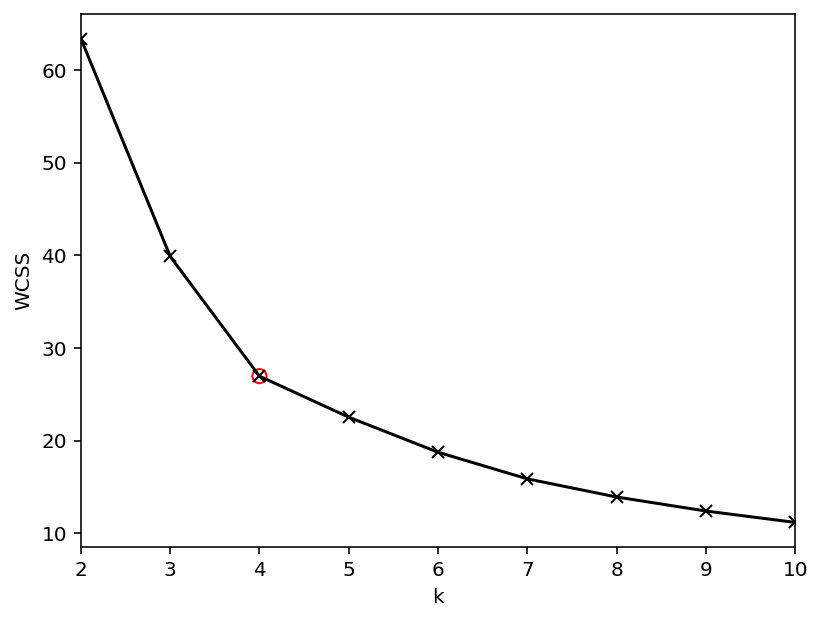

In [264]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.savefig('elbow_plot.png')
    plt.show()
    return

def one_silhouette_inertia(n, xy):
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    _score = silhouette_score(xy, labels)
    _inertia = kmeans.inertia_
    return _score, _inertia

wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhouette_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhouette score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)


In [260]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)

In [198]:
def plot_clustered_data(labels, xy, cluster_centers_x, cluster_centers_y, center_labels):
    """
    Plots clustered data as a scatter plot with cluster centers highlighted.
    
    Parameters:
    - labels (array-like): Cluster labels assigned to each data point.
    - xy (array-like): The data points to be plotted, in shape (n_samples, 2).
    - cluster_centers_x (array-like): The x-coordinates of the cluster centers.
    - cluster_centers_y (array-like): The y-coordinates of the cluster centers.
    - center_labels (array-like): Labels for the cluster centers to distinguish them in the plot.
    
    Saves the plot as 'clustering.png' and displays it.
    """
    # Create a custom colormap based on the number of unique cluster labels
    unique_labels = np.unique(labels)
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
    cmap = ListedColormap(colors)
    
    # Create the figure and axis for the plot
    fig, ax = plt.subplots(dpi=144)
    
    # Plot the clustered data points
    scatter = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o', label='Data Points')
    
    # Plot the cluster centers with a different marker
    ax.scatter(cluster_centers_x, cluster_centers_y, c=center_labels, cmap=cmap, marker='x', s=100, label='Cluster Centers')

    # Add colorbar to indicate cluster label associations
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_ticks(unique_labels)  # Set ticks to the unique cluster labels
    
    # Labeling and styling the plot
    ax.set_xlabel('Economic Loss (Million $)')
    ax.set_ylabel('Avg Waste per Capita (Kg)')
    ax.set_xscale('log')  # Log scale for the x-axis
    
    # Add legend
    ax.legend(loc='best')
    
    # Save the plot as an image and display it
    plt.savefig('clustering.png')
    plt.show()


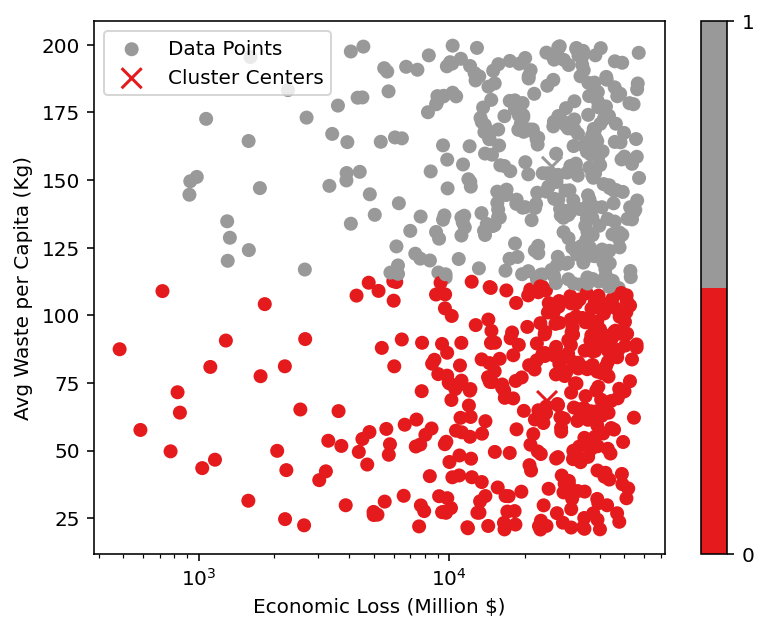

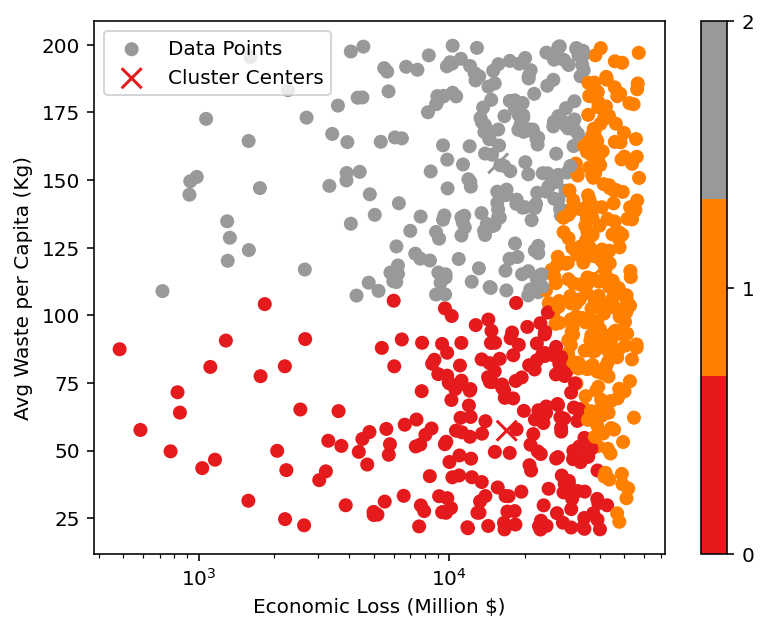

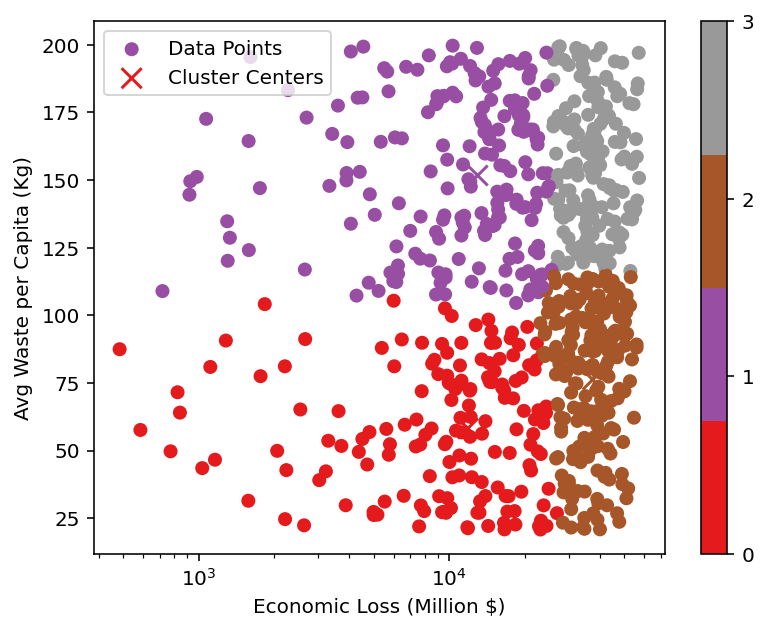

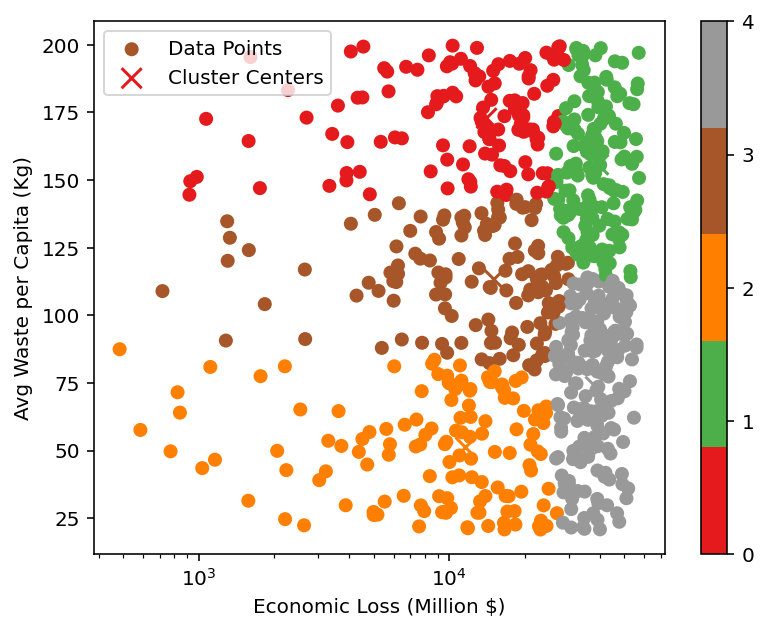

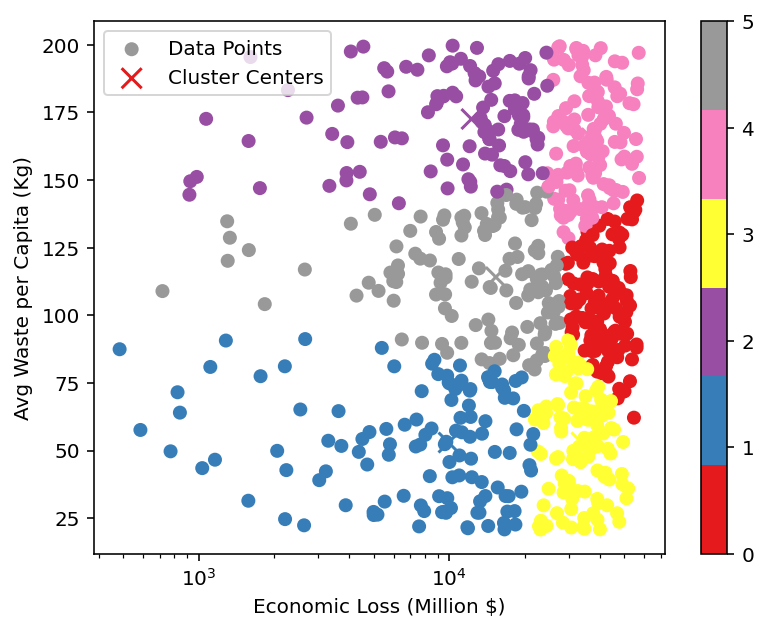

In [254]:
inv_norm = scaler.inverse_transform(norm)  # this is important for plotting data accurately
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_clustered_data(labels, inv_norm, xkmeans, ykmeans, cenlabels)

In [ ]:
def perform_fitting(df, col1, col2):
    # Gather data and prepare for fitting

    # Fit model

    # Predict across x
    return data, x, y


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


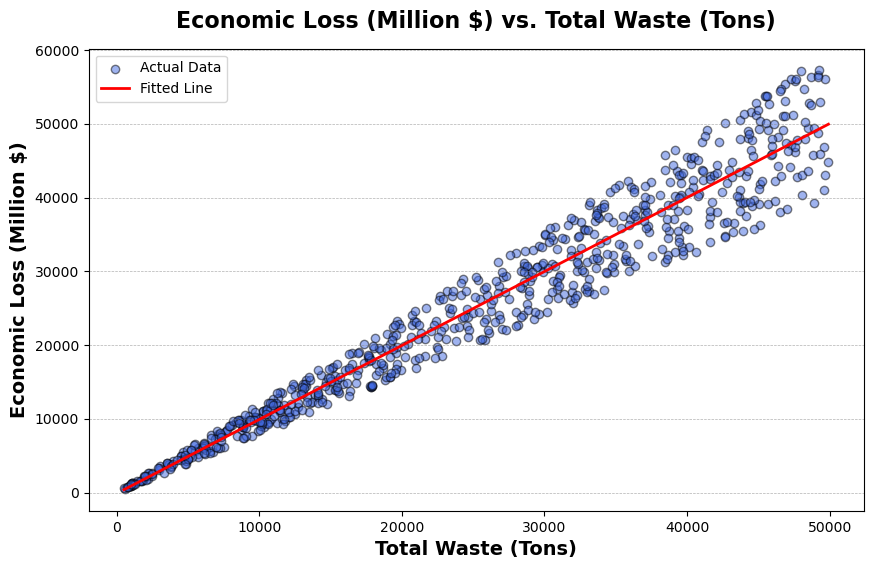

In [75]:
def perform_fitting(df, col1, col2):
    """
    Fits a linear regression model between two columns.
    """
    
    X = df[['Total Waste (Tons)']].values  # Independent variable (reshape needed for sklearn)
    y = df['Economic Loss (Million $)'].values    # Dependent variable

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate predictions over a range of x values
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Create range for predictions
    y_pred = model.predict(x_range)  # Predicted Y values

    return df, x_range, y_pred, model

def plot_fitted_data(data, x, y, col1, col2, model):
    """
    Plots actual data points and fitted regression line.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for actual data with transparency
    ax.scatter(data['Total Waste (Tons)'], data['Economic Loss (Million $)'], label="Actual Data", color='royalblue', alpha=0.5, edgecolors='k')

    # Fitted regression line
    ax.plot(x, y, color='red', label="Fitted Line", linewidth=2)

    # Regression equation and R² value
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(data[[col1]], data[col2])
    # Improved axis labels
    ax.set_xlabel(col1, fontsize=14, fontweight='bold')
    ax.set_ylabel(col2, fontsize=14, fontweight='bold')

    # Better title formatting
    ax.set_title(f"{col2} vs. {col1}", fontsize=16, fontweight='bold', pad=15)

    # Move legend to a non-intrusive position
    ax.legend()

    # Improved grid styling
    ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='y', color='gray', linewidth=0.5)

    # Save the plot
    plt.savefig('fitting_improved.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

# Load dataset
# Perform fitting
data, x_vals, y_vals, regression_model = perform_fitting(df, 'Total Waste (Tons)', 'Economic Loss (Million $)')

# Plot the fitted data
plot_fitted_data(data, x_vals, y_vals, 'Total Waste (Tons)', 'Economic Loss (Million $)', regression_model)


In [57]:
def perform_fitting(df, col1, col2):
    # Gather data and prepare for fitting
    df = df.dropna(subset=[col1, col2])
    X = df[['Total Waste (Tons)']].values
    y = df['Economic Loss (Million $)'].values
    col2 = df['Economic Loss (Million $)']
    col1 = df['Total Waste (Tons)']
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict across x
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    
    return df, x_range, y_pred


def plot_fitted_data(data, x, y):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], label="Actual Data", alpha=0.5)
    ax.plot(x, y, color='red', label="Fitted Line")
    ax.legend()
    plt.savefig('fitting.png')
    return


In [59]:
perform_fitting(df, col1, col2)

NameError: name 'col1' is not defined


Preview of the Data:
           Country        Food Category  Total Waste (Tons)  \
Year                                                          
2024         India  Fruits & Vegetables            11962.89   
2024       Germany        Prepared Food            45038.72   
2024  South Africa          Frozen Food            39478.70   
2024           USA            Beverages            22924.85   
2024  Saudi Arabia        Prepared Food            33085.77   

      Economic Loss (Million $)  Avg Waste per Capita (Kg)  \
Year                                                         
2024                   11196.04                     136.21   
2024                   39191.25                     179.27   
2024                   40087.26                     155.55   
2024                   22406.24                      89.59   
2024                   28923.13                      37.71   

      Population (Million)  Household Waste (%)  
Year                                             
2

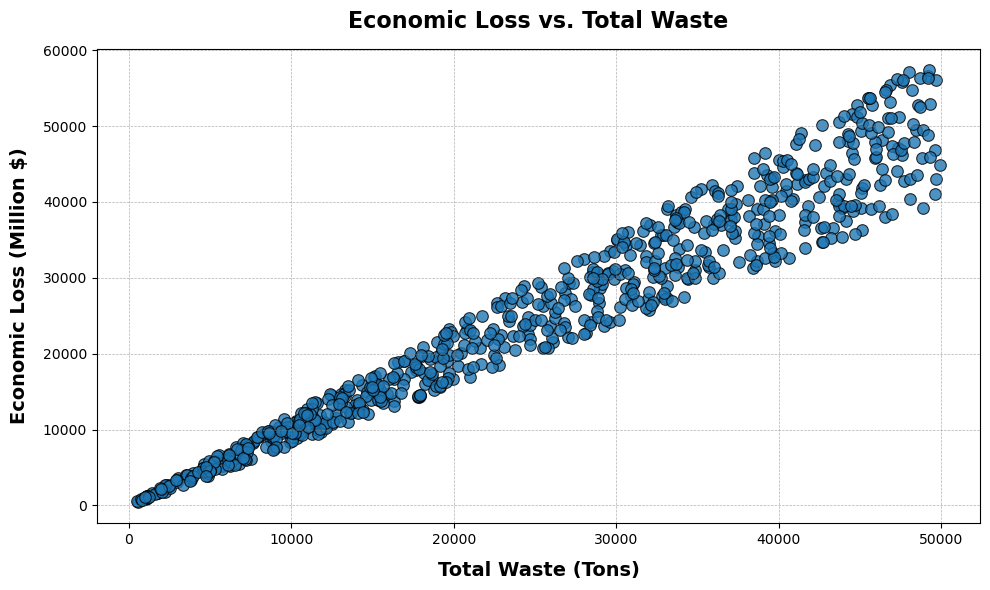

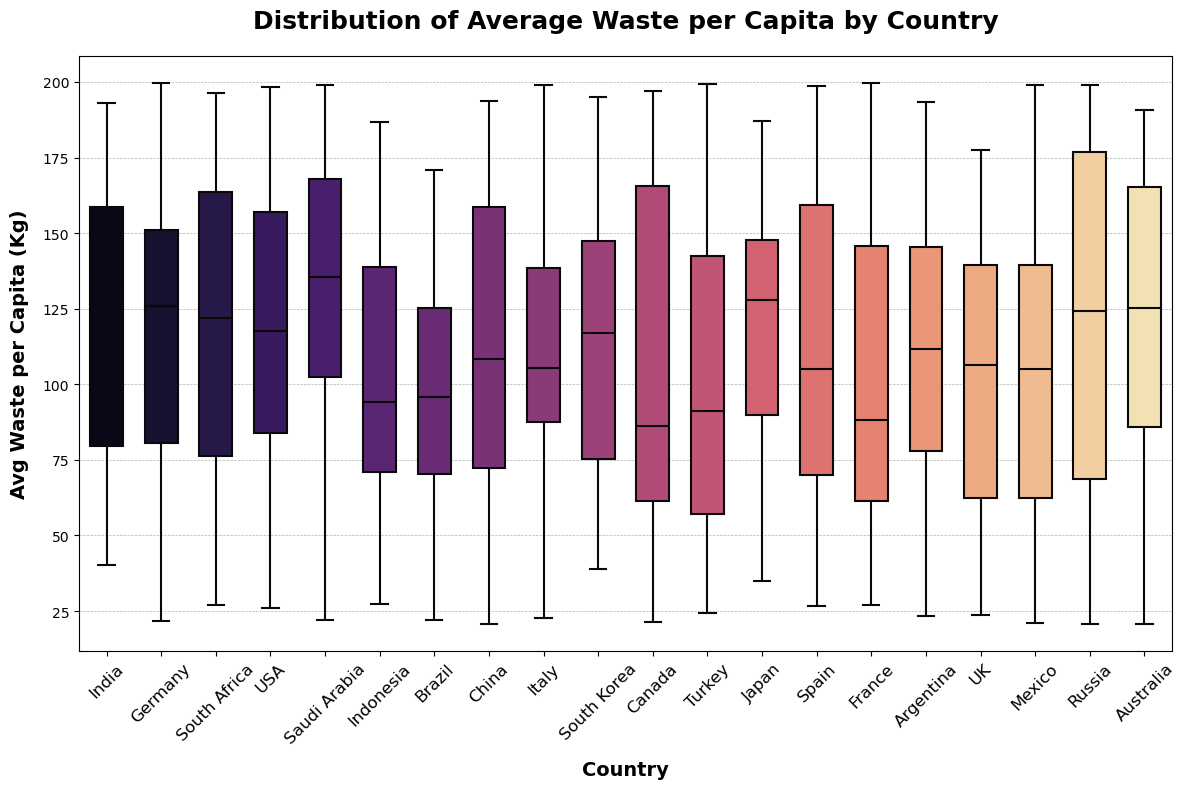

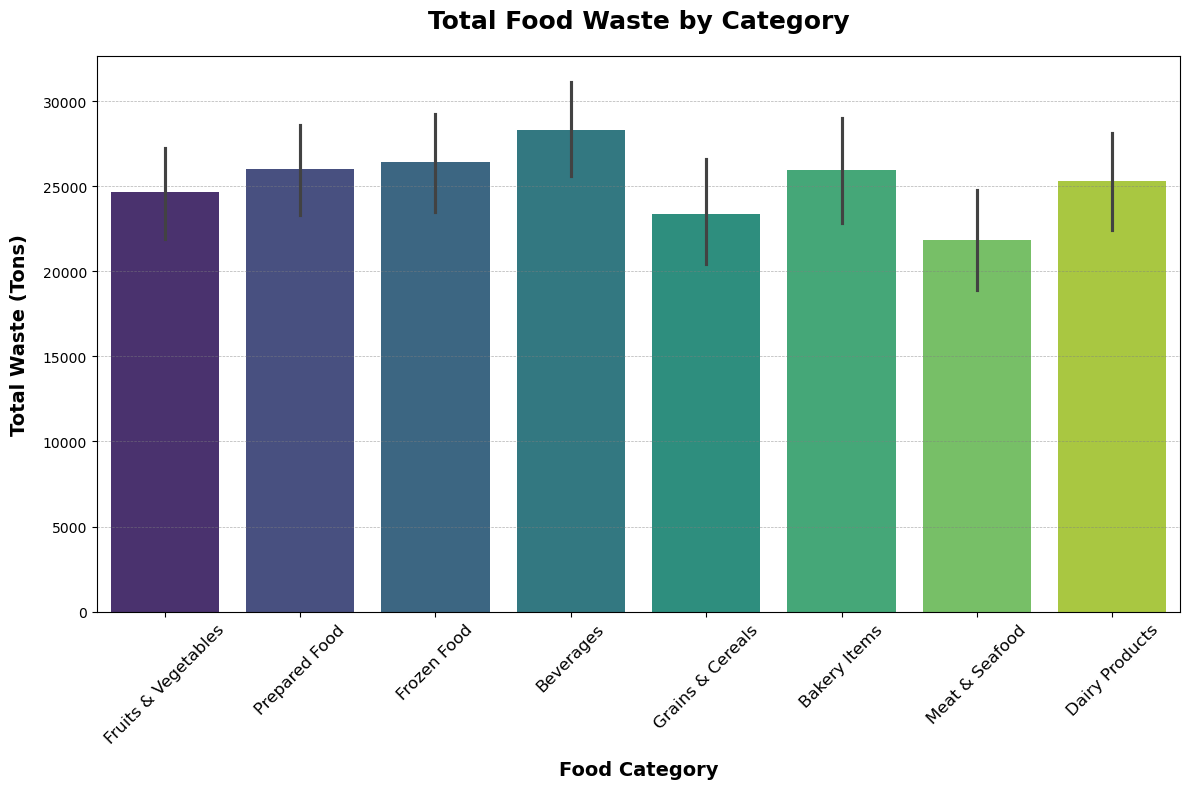

For the attribute Total Waste (Tons):
Mean = 25200.91, Standard Deviation = 14289.533700, Skewness = -0.003205, and Excess Kurtosis = -1.247914.
The data was not skewed and platykurtic.
 2 clusters silhouette score = 0.36
 3 clusters silhouette score = 0.39
 4 clusters silhouette score = 0.41
 5 clusters silhouette score = 0.38
 6 clusters silhouette score = 0.37
 7 clusters silhouette score = 0.38
 8 clusters silhouette score = 0.37
 9 clusters silhouette score = 0.36
10 clusters silhouette score = 0.36
Best number of clusters =  4


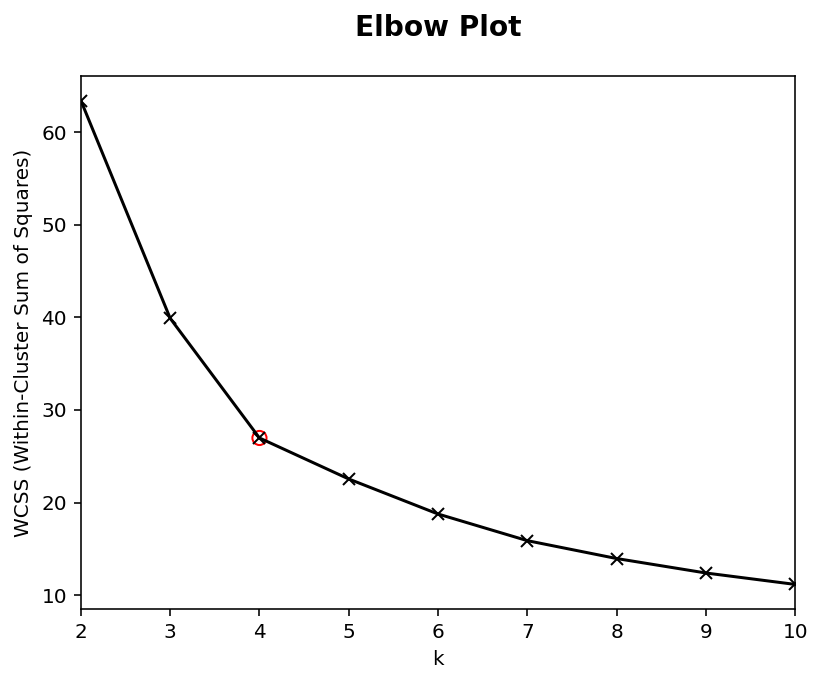

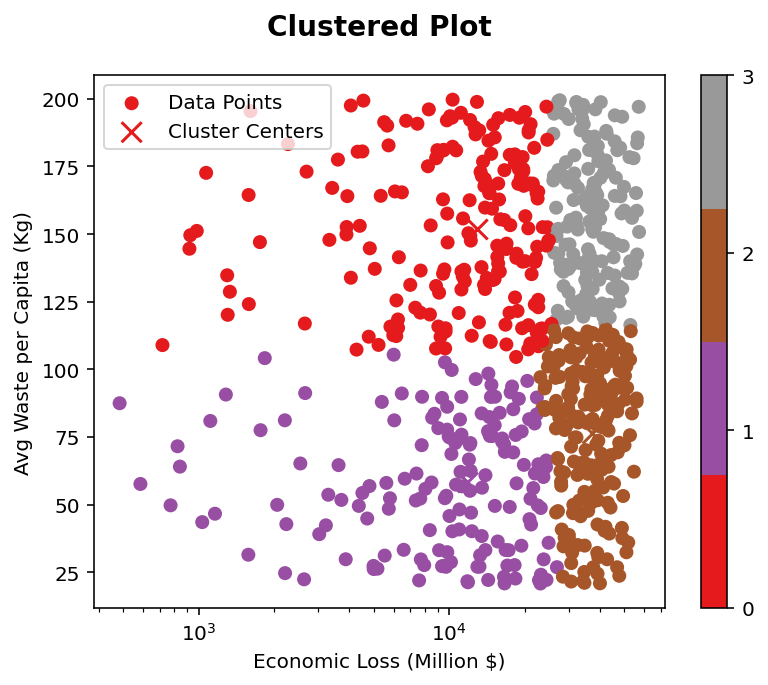

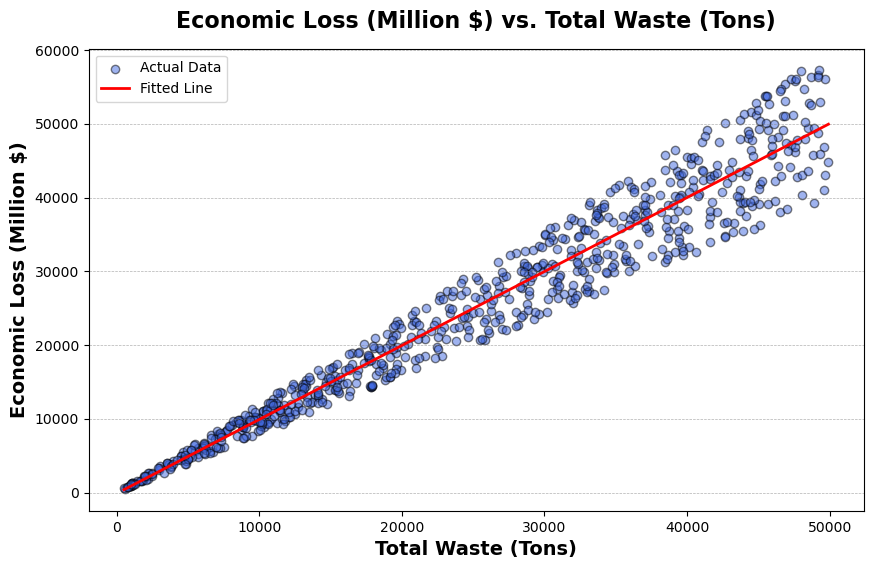

In [306]:
"""
This is the template file for the clustering and fitting assignment.
You will be expected to complete all the sections and
make this a fully working, documented file.
You should NOT change any function, file or variable names,
 if they are given to you here.
Make use of the functions presented in the lectures
and ensure your code is PEP-8 compliant, including docstrings.
Fitting should be done with only 1 target variable and 1 feature variable,
likewise, clustering should be done with only 2 variables.
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

def plot_relational_plot(df):
    """
    Visualizes the relationship between Total Waste and Economic Loss using a scatter plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    # Scatter plot
    sns.scatterplot(
        x='Total Waste (Tons)',
        y='Economic Loss (Million $)',
        data=df,
        alpha=0.8,
        s=70,
        edgecolors='black',
        linewidths=0.8
    )
    # Set axis labels
    ax.set_xlabel('Total Waste (Tons)', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Economic Loss (Million $)', fontsize=14, fontweight='bold', labelpad=10)
    # Set plot title
    ax.set_title('Economic Loss vs. Total Waste', fontsize=16, fontweight='bold', pad=15)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('relational_plot.png')
    plt.show()
    return


def plot_categorical_plot(df):
    """
    Plots a bar chart to compare total food waste (in tons) across different food categories.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the bar plot
    sns.barplot(
        x='Food Category',
        y='Total Waste (Tons)',
        data=df,
        ax=ax,
        palette='viridis',
        hue='Food Category',
        dodge=False,
        legend=False
    )
    # Set axis labels
    ax.set_xlabel('Food Category', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Total Waste (Tons)', fontsize=14, fontweight='bold', labelpad=10)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    # Set title
    ax.set_title('Total Food Waste by Category', fontsize=18, fontweight='bold', pad=20)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='y', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('food_waste_by_category.png')
    plt.show()
    return


def plot_statistical_plot(df):
    """
    Visualizes the distribution of average waste per capita (Kg) across different countries using a box plot.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the box plot
    sns.boxplot(
        x='Country',
        y='Avg Waste per Capita (Kg)',
        data=df,
        palette='magma',
        width=0.6,
        linewidth=1.5,
        fliersize=4,
        ax=ax,
        hue='Country',
        dodge=False
    )
    # Set title and labels
    ax.set_title('Distribution of Average Waste per Capita by Country', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Country', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Avg Waste per Capita (Kg)', fontsize=14, fontweight='bold', labelpad=10)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='y', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('waste_distribution.png')
    plt.show()
    return


def statistical_analysis(df, col: str):
    """
    Compute statistical moments: mean, standard deviation, skewness,
    and excess kurtosis for a given column.
    """
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col])
    excess_kurtosis = ss.kurtosis(df[col])
    return mean, stddev, skew, excess_kurtosis


def preprocessing(df):
    """
    Prepare the data by detecting missing values, generating summary statistics, and assessing correlations.
    """
    # Display the first few rows of the data
    print("\nPreview of the Data:")
    print(df.head())
    # Show summary statistics for numeric columns
    print("\nStatistical Summary:")
    print(df.describe())
    # Identify columns with missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values per Column:")
    print(missing_values[missing_values > 0])
    # Focus on numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    # Calculate and display the correlation matrix for numeric data
    print("\nCorrelation Matrix:")
    print(numeric_df.corr())
    return df


def writing(moments, col):
    """
    Print statistical moments analysis.
    """
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:2f}, '
          f'Skewness = {moments[2]:2f}, and '
          f'Excess Kurtosis = {moments[3]:2f}.')
    print('The data was not skewed and platykurtic.')
    return


def perform_clustering(df, col1, col2):
    """
    Performs K-means clustering on two specified columns and returns clustering results.
    """
    df_clust = df[[col1, col2]].copy()
    scaler = MinMaxScaler()
    norm = scaler.fit_transform(df_clust)
    inv_norm = scaler.inverse_transform(norm)

    def plot_elbow_method(min_k, max_k, wcss, best_n):
        """
        Plots the elbow method to determine the optimal number of clusters.
        """
        fig, ax = plt.subplots(dpi=144)
        ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
        ax.scatter(best_n, wcss[best_n - min_k], marker='o', color='red', facecolors='none', s=50)
        ax.set_xlabel('k')
        ax.set_xlim(min_k, max_k)
        plt.title('Elbow Plot', fontsize=14, fontweight='bold', pad=20)
        ax.set_ylabel('WCSS (Within-Cluster Sum of Squares)')
        plt.savefig('elbow_plot.png')
        plt.show()
        return

    def one_silhouette_inertia(n, xy):
        """
        Computes the silhouette score and inertia for a given number of clusters.
        """
        kmeans = KMeans(n_clusters=n, n_init=20, random_state=42)
        kmeans.fit(xy)
        labels = kmeans.labels_
        _score = silhouette_score(xy, labels)
        _inertia = kmeans.inertia_
        return _score, _inertia

    wcss = []
    best_n, best_score = None, -np.inf
    for n in range(2, 11):
        score, inertia = one_silhouette_inertia(n, norm)
        wcss.append(inertia)
        if score > best_score:
            best_n = n
            best_score = score
        print(f"{n:2g} clusters silhouette score = {score:0.2f}")


    kmeans = KMeans(n_clusters=best_n, n_init=20, random_state=42)
    kmeans.fit(norm)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)

    print(f"Best number of clusters = {best_n:2g}")
    one_silhouette_inertia(best_n, norm)
    plot_elbow_method(2, 10, wcss, best_n)

    return labels, inv_norm, xkmeans, ykmeans, cenlabels
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def plot_clustered_data(labels, xy, cluster_centers_x, cluster_centers_y, center_labels):
    """
    Plots clustered data as a scatter plot with cluster centers highlighted.
    """
    unique_labels = np.unique(labels)
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
    cmap = ListedColormap(colors)

    fig, ax = plt.subplots(dpi=144)
    scatter = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o', label='Data Points')
    ax.scatter(cluster_centers_x, cluster_centers_y, c=center_labels, cmap=cmap, marker='x', s=100, label='Cluster Centers')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_ticks(unique_labels)
    ax.set_xlabel('Economic Loss (Million $)')
    ax.set_ylabel('Avg Waste per Capita (Kg)')
    ax.set_xscale('log')
    plt.title('Clustered Plot', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='best')
    plt.savefig('clustering.png')
    plt.show()

def perform_fitting(df, col1, col2):
    """
    Fits a linear regression model between two columns.
    """
    X = df[[col1]].values
    y = df[col2].values
    model = LinearRegression()
    model.fit(X, y)
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    return df, x_range, y_pred, model

def plot_fitted_data(data, x, y, model):
    """
    Plots actual data points and fitted regression line.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(data['Total Waste (Tons)'], data['Economic Loss (Million $)'],
                label="Actual Data", color='royalblue', alpha=0.5, edgecolors='k')
    ax.plot(x, y, color='red', label="Fitted Line", linewidth=2)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(data[['Total Waste (Tons)']], data['Economic Loss (Million $)'])
    ax.set_xlabel('Total Waste (Tons)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Economic Loss (Million $)', fontsize=14, fontweight='bold')
    ax.set_title(f"Economic Loss (Million $) vs. Total Waste (Tons)", fontsize=16, fontweight='bold', pad=15)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6, which='both',
                axis='y', color='gray', linewidth=0.5)
    plt.savefig('fitting_improved.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    df = pd.read_csv('dataset.csv', index_col='Year').loc[[2024]]
    df = preprocessing(df)
    col = 'Total Waste (Tons)'
    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)
    moments = statistical_analysis(df, col)
    writing(moments, col)
    clustering_results = perform_clustering(df, 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)')
    plot_clustered_data(*clustering_results)
    fitting_results = perform_fitting(df, 'Total Waste (Tons)', 'Economic Loss (Million $)')
    plot_fitted_data(*fitting_results)
    return

if __name__ == '__main__':
    main()


Preview of the Data:
     Country  Year        Food Category  Total Waste (Tons)  \
0  Australia  2019  Fruits & Vegetables            19268.63   
1  Indonesia  2019        Prepared Food             3916.97   
2    Germany  2022       Dairy Products             9700.16   
3     France  2023  Fruits & Vegetables            46299.69   
4     France  2023            Beverages            33096.57   

   Economic Loss (Million $)  Avg Waste per Capita (Kg)  Population (Million)  \
0                   18686.68                      72.69                 87.59   
1                    4394.48                     192.52               1153.99   
2                    8909.16                     166.94               1006.11   
3                   40551.22                     120.19                953.05   
4                   36980.82                     104.74               1105.47   

   Household Waste (%)  
0                53.64  
1                30.61  
2                48.08  
3           

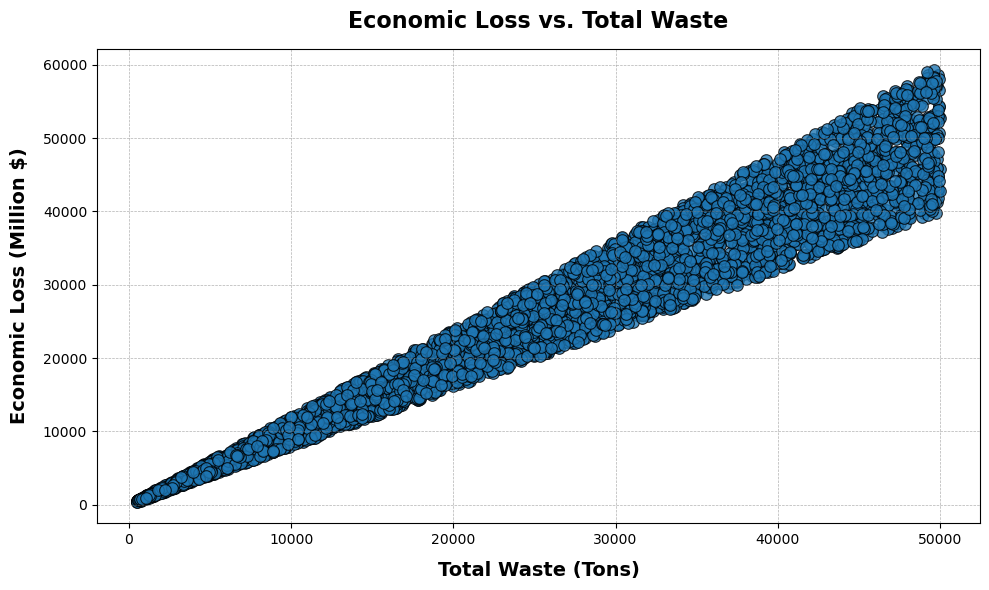

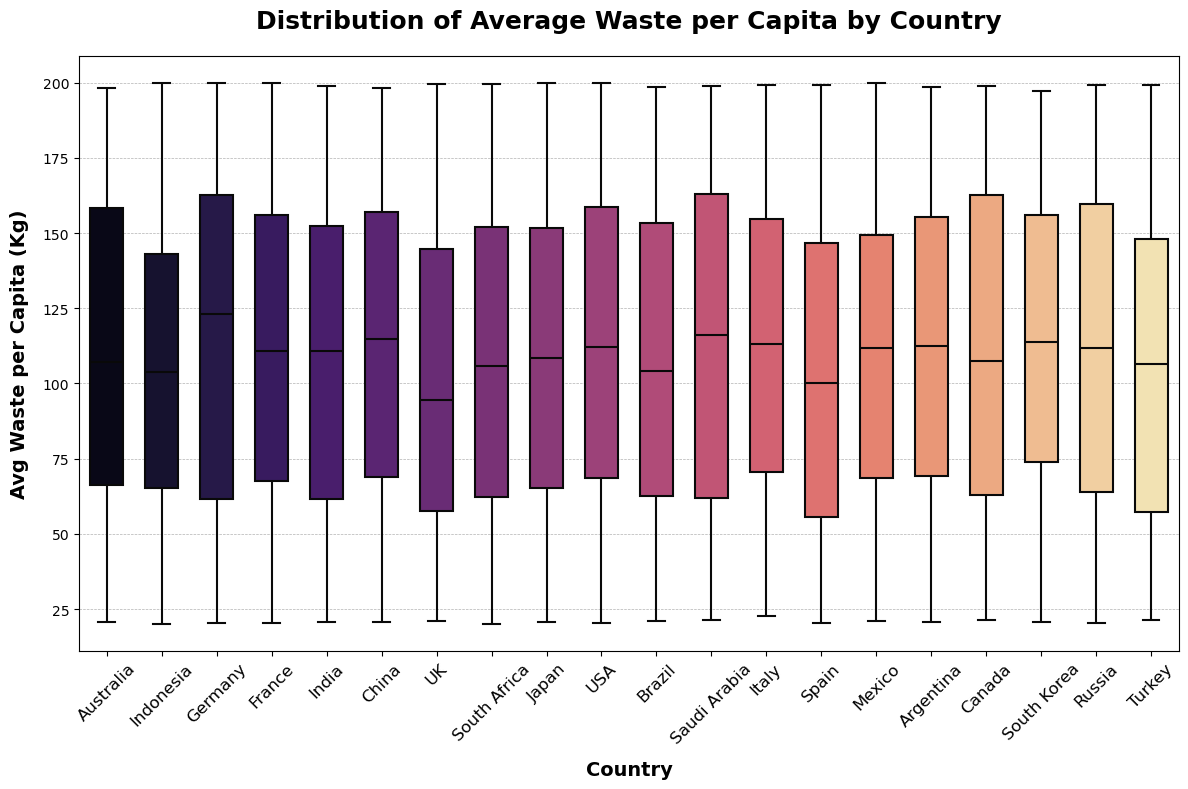

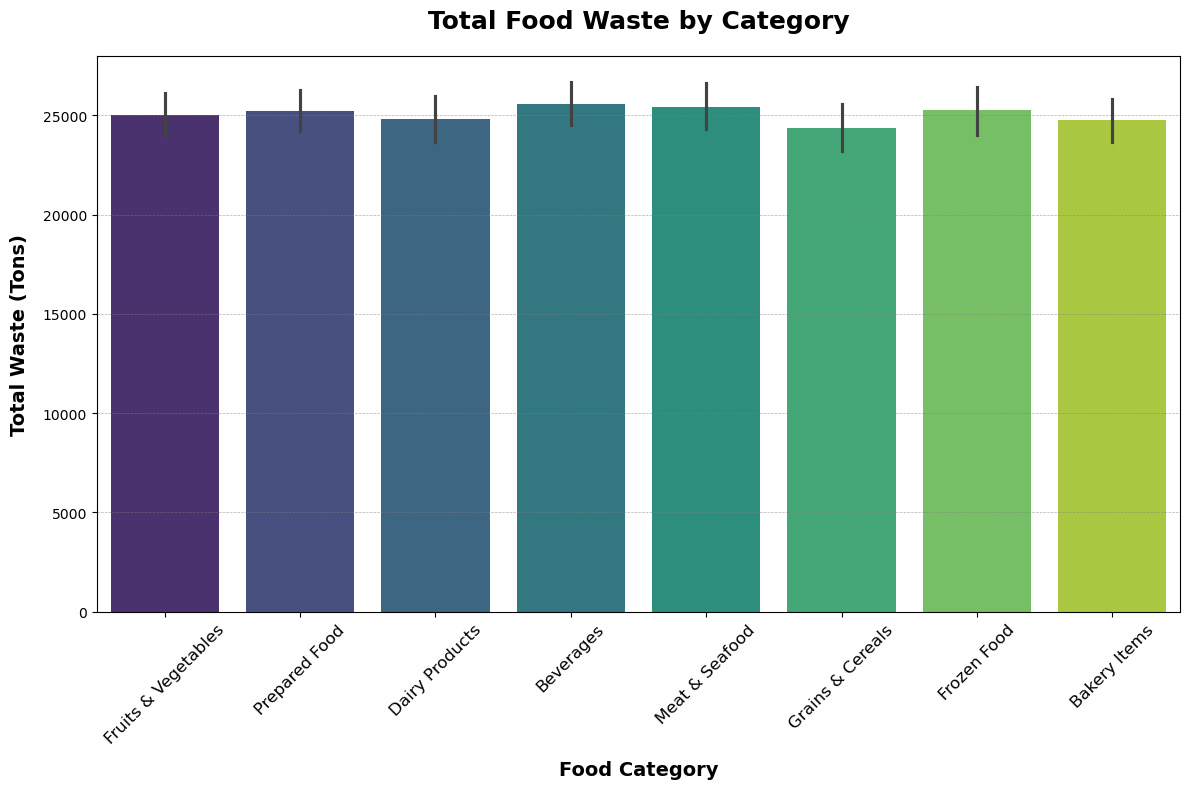

For the attribute Total Waste (Tons):
Mean = 25061.78, Standard Deviation = 14245.119588, Skewness = 0.024773, and Excess Kurtosis = -1.195748.
The data was not skewed and platykurtic.
 2 clusters silhouette score = 0.39
 3 clusters silhouette score = 0.39
 4 clusters silhouette score = 0.40
 5 clusters silhouette score = 0.38
 6 clusters silhouette score = 0.37
 7 clusters silhouette score = 0.37
 8 clusters silhouette score = 0.36
 9 clusters silhouette score = 0.36
10 clusters silhouette score = 0.35
Best number of clusters =  4


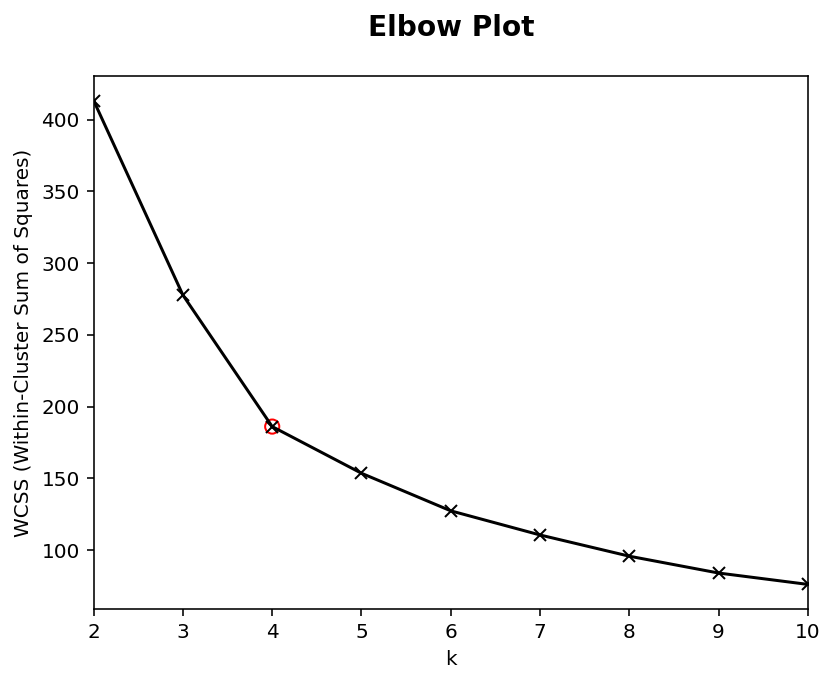

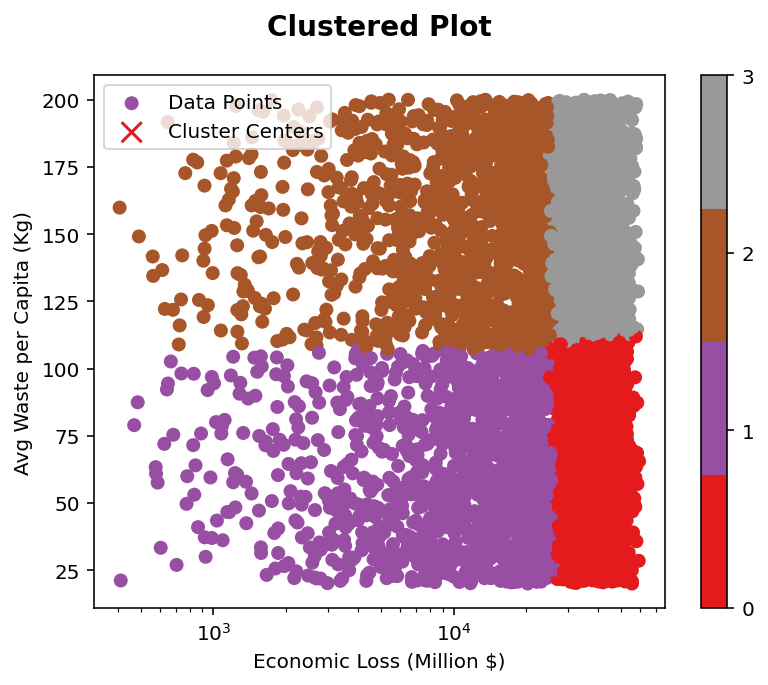

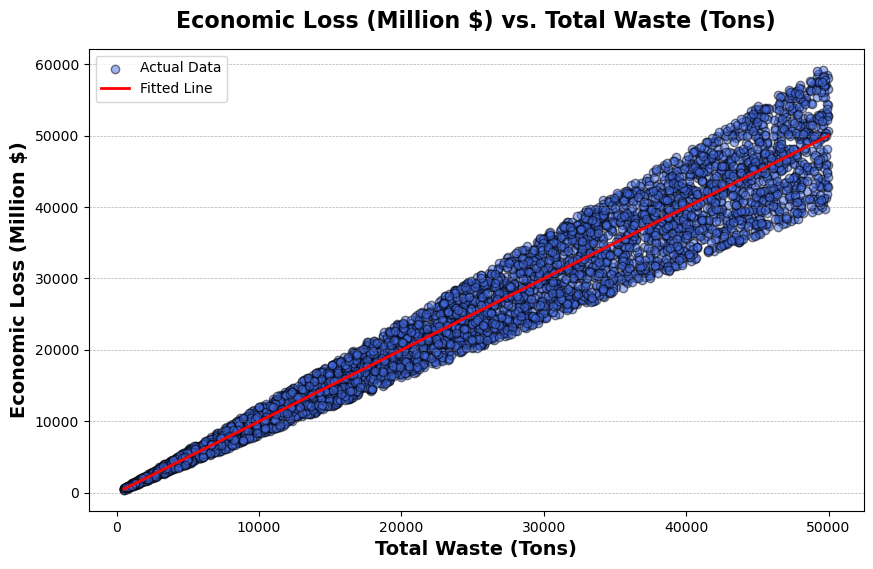

In [314]:
"""
This is the template file for the clustering and fitting assignment.
You will be expected to complete all the sections and
make this a fully working, documented file.
You should NOT change any function, file or variable names,
 if they are given to you here.
Make use of the functions presented in the lectures
and ensure your code is PEP-8 compliant, including docstrings.
Fitting should be done with only 1 target variable and 1 feature variable,
likewise, clustering should be done with only 2 variables.
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

def plot_relational_plot(df):
    """
    Visualizes the relationship between Total Waste and Economic Loss using a scatter plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    # Scatter plot
    sns.scatterplot(
        x='Total Waste (Tons)',
        y='Economic Loss (Million $)',
        data=df,
        alpha=0.8,
        s=70,
        edgecolors='black',
        linewidths=0.8
    )
    # Set axis labels
    ax.set_xlabel('Total Waste (Tons)', 
                  fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Economic Loss (Million $)', 
                  fontsize=14, fontweight='bold', labelpad=10)
    # Set plot title
    ax.set_title('Economic Loss vs. Total Waste', fontsize=16, fontweight='bold', pad=15)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('relational_plot.png')
    plt.show()
    return


def plot_categorical_plot(df):
    """
    Plots a bar chart to compare total food waste (in tons) across different food categories.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the bar plot
    sns.barplot(
        x='Food Category',
        y='Total Waste (Tons)',
        data=df,
        ax=ax,
        palette='viridis',
        hue='Food Category',
        dodge=False,
        legend=False
    )
    # Set axis labels
    ax.set_xlabel('Food Category', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Total Waste (Tons)', fontsize=14, fontweight='bold', labelpad=10)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    # Set title
    ax.set_title('Total Food Waste by Category', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', 
            axis='y', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('food_waste_by_category.png')
    plt.show()
    return


def plot_statistical_plot(df):
    """
    Visualizes the distribution of average waste per capita 
    (Kg) across different countries using a box plot.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the box plot
    sns.boxplot(
        x='Country',
        y='Avg Waste per Capita (Kg)',
        data=df,
        palette='magma',
        width=0.6,
        linewidth=1.5,
        fliersize=4,
        ax=ax,
        hue='Country',
        dodge=False
    )
    # Set title and labels
    ax.set_title('Distribution of Average Waste per Capita by Country', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Country', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Avg Waste per Capita (Kg)', fontsize=14, 
                  fontweight='bold', labelpad=10)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', 
            axis='y', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('waste_distribution.png')
    plt.show()
    return


def statistical_analysis(df, col: str):
    """
    Compute statistical moments: mean, standard deviation, skewness,
    and excess kurtosis for a given column.
    """
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col])
    excess_kurtosis = ss.kurtosis(df[col])
    return mean, stddev, skew, excess_kurtosis


def preprocessing(df):
    """
    Prepare the data by detecting missing values, generating summary statistics, 
    and assessing correlations.
    """
    # Display the first few rows of the data
    print("\nPreview of the Data:")
    print(df.head())
    # Show summary statistics for numeric columns
    print("\nStatistical Summary:")
    print(df.describe())
    # Identify columns with missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values per Column:")
    print(missing_values[missing_values > 0])
    # Focus on numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    # Calculate and display the correlation matrix for numeric data
    print("\nCorrelation Matrix:")
    print(numeric_df.corr())
    return df


def writing(moments, col):
    """
    Print statistical moments analysis.
    """
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:2f}, '
          f'Skewness = {moments[2]:2f}, and '
          f'Excess Kurtosis = {moments[3]:2f}.')
    print('The data was not skewed and platykurtic.')
    return


def perform_clustering(df, col1, col2):
    """
    Performs K-means clustering on two specified columns and returns clustering results.
    """
    df_clust = df[[col1, col2]].copy()
    scaler = MinMaxScaler()
    norm = scaler.fit_transform(df_clust)
    inv_norm = scaler.inverse_transform(norm)

    def plot_elbow_method(min_k, max_k, wcss, best_n):
        """
        Plots the elbow method to determine the optimal number of clusters.
        """
        fig, ax = plt.subplots(dpi=144)
        ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
        ax.scatter(best_n, wcss[best_n - min_k], 
                   marker='o', color='red', facecolors='none', s=50)
        ax.set_xlabel('k')
        ax.set_xlim(min_k, max_k)
        plt.title('Elbow Plot', fontsize=14, fontweight='bold', pad=20)
        ax.set_ylabel('WCSS (Within-Cluster Sum of Squares)')
        plt.savefig('elbow_plot.png')
        plt.show()
        return

    def one_silhouette_inertia(n, xy):
        """
        Computes the silhouette score and inertia for a given number of clusters.
        """
        kmeans = KMeans(n_clusters=n, n_init=20, random_state=42)
        kmeans.fit(xy)
        labels = kmeans.labels_
        _score = silhouette_score(xy, labels)
        _inertia = kmeans.inertia_
        return _score, _inertia

    wcss = []
    best_n, best_score = None, -np.inf
    for n in range(2, 11):
        score, inertia = one_silhouette_inertia(n, norm)
        wcss.append(inertia)
        if score > best_score:
            best_n = n
            best_score = score
        print(f"{n:2g} clusters silhouette score = {score:0.2f}")


    kmeans = KMeans(n_clusters=best_n, n_init=20, random_state=42)
    kmeans.fit(norm)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)

    print(f"Best number of clusters = {best_n:2g}")
    one_silhouette_inertia(best_n, norm)
    plot_elbow_method(2, 10, wcss, best_n)

    return labels, inv_norm, xkmeans, ykmeans, cenlabels
 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def plot_clustered_data(labels, xy, cluster_centers_x, cluster_centers_y, center_labels):
    """
    Plots clustered data as a scatter plot with cluster centers highlighted.
    """
    unique_labels = np.unique(labels)
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
    cmap = ListedColormap(colors)

    fig, ax = plt.subplots(dpi=144)
    scatter = ax.scatter(xy[:, 0], xy[:, 1], c=labels, 
                         cmap=cmap, marker='o', label='Data Points')
    ax.scatter(cluster_centers_x, cluster_centers_y, 
               c=center_labels, cmap=cmap, marker='x', s=100, label='Cluster Centers')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_ticks(unique_labels)
    ax.set_xlabel('Economic Loss (Million $)')
    ax.set_ylabel('Avg Waste per Capita (Kg)')
    ax.set_xscale('log')
    plt.title('Clustered Plot', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='best')
    plt.savefig('clustering.png')
    plt.show()

def perform_fitting(df, col1, col2):
    """
    Fits a linear regression model between two columns.
    """
    X = df[[col1]].values
    y = df[col2].values
    model = LinearRegression()
    model.fit(X, y)
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    return df, x_range, y_pred, model

def plot_fitted_data(data, x, y, model):
    """
    Plots actual data points and fitted regression line.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(data['Total Waste (Tons)'], data['Economic Loss (Million $)'],
                label="Actual Data", color='royalblue', alpha=0.5, edgecolors='k')
    ax.plot(x, y, color='red', label="Fitted Line", linewidth=2)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(data[['Total Waste (Tons)']], data['Economic Loss (Million $)'])
    ax.set_xlabel('Total Waste (Tons)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Economic Loss (Million $)', fontsize=14, fontweight='bold')
    ax.set_title(f"Economic Loss (Million $) vs. Total Waste (Tons)", 
                 fontsize=16, fontweight='bold', pad=15)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6, which='both',
                axis='y', color='gray', linewidth=0.5)
    plt.savefig('fitting_improved.png', dpi=300, bbox_inches='tight')
    plt.show()


def main():
    df = pd.read_csv('dataset.csv')
    df = preprocessing(df)
    col = 'Total Waste (Tons)'
    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)
    moments = statistical_analysis(df, col)
    writing(moments, col)
    clustering_results = perform_clustering(df, 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)')
    plot_clustered_data(*clustering_results)
    fitting_results = perform_fitting(df, 'Total Waste (Tons)', 'Economic Loss (Million $)')
    plot_fitted_data(*fitting_results)
    return

if __name__ == '__main__':
    main()
